In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm
import astropy.units as u 
from astropy.coordinates import SkyCoord
import regions
from regions import Regions

from spectral_cube import SpectralCube
import importlib as imp

from dust_extinction.averages import CT06_MWLoc, I05_MWAvg, CT06_MWGC, G21_MWAvg, RL85_MWGC, RRP89_MWGC, F11_MWGC




In [2]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
import moment_maker as mm
from jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
import cutout_manager as cm
import jwst_plots
import co_ice as co_map
imp.reload(co_map)
import extinction as ex


In [4]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [ ]:
# log10 N_COice = 0.07 * Av + 15.6
# N_H2 = Av * 2.21e21
# Av = N_H2 / 2.21e21
# log10 N_COice = 0.07 * N_H2 / 2.21e21 + 15.6
# N_COice = 10**(0.07 * N_H2 / 2.21e21 + 15.6) = 10**(0.07 * N_H2 / 2.21e21) * 10**15.6
# N_COice = 10**(0.07 * N_H2 / 2.21e21) * 10**15.6
# N_COtot = N_H2 * 1e-4 
# N_COice/N_COtot = 10**(0.07 * N_H2 / 2.21e21) * 10**15.6 / N_H2 * 1e-4
# N_COice/N_COtot = 10**(0.07 * N_H2 / 2.21e21) * 10**19.6 / N_H2 

# Catalog

In [5]:
cat_use = make_cat_use()

In [6]:
pos = SkyCoord('17:46:20.6290029866', '-28:37:49.5114204513', unit=(u.hour, u.deg))
l = 113.8*u.arcsec
w = 3.3*u.arcmin
reg = regions.RectangleSkyRegion(pos, width=l, height=w)

In [7]:
cutout_405 = cm.get_cutout_405(pos, w, l)
ww = cutout_405.wcs
data = cutout_405.data
blank_cutout = np.zeros_like(data)*np.nan

fn = '/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
#fn = '/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged-nodestreak_i2d-perfilt64.fits'
hdu_405 = fits.open(fn)
data_405 = hdu_405[1].data
head_405 = hdu_405[1].header
blank_405 = np.zeros_like(data_405)*np.nan

In [8]:
cat_filament = JWSTCatalog(cat_use.table_region_mask([reg], ww))
mask_red = (cat_filament.color('f182m', 'f410m') > 2) | (np.isnan(np.array(cat_filament.band('f182m'))) & np.isnan(np.array(cat_filament.band('f187n'))))
mask_red = mask_red & (cat_filament.color('f410m', 'f466n') < 0)
cat_filament = JWSTCatalog(cat_filament.catalog[mask_red])

In [10]:
reg_f = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/filament_short.region')
cat_f = cat_f = JWSTCatalog(cat_use.table_region_mask(reg_f, ww))
mask_red = (cat_f.color('f182m', 'f410m') > 2) | (np.isnan(np.array(cat_f.band('f182m'))) & np.isnan(np.array(cat_f.band('f187n')))) 
mask_red = mask_red & (cat_f.color('f410m', 'f466n') < 0)
cat_f = JWSTCatalog(cat_f.catalog[mask_red])

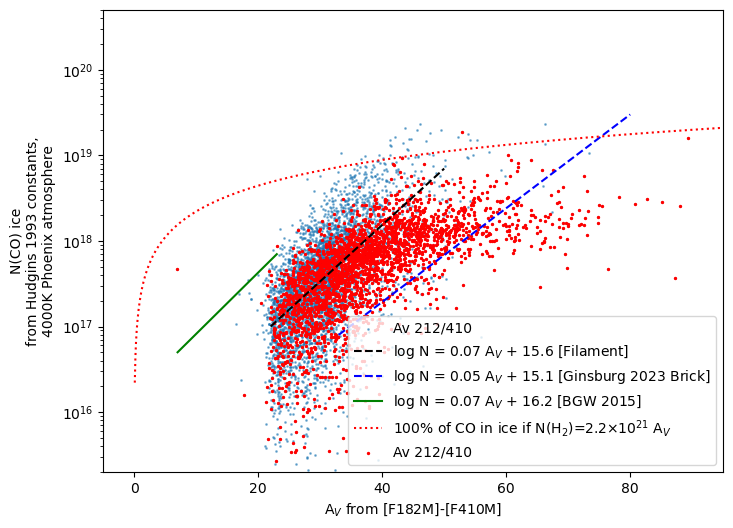

In [11]:
fig = plt.figure(figsize=(8, 6))
Av, Nco = co_map.plot_Av_COice(cat=cat_filament, extras=True, s=1, alpha=0.5)
Avf, Ncof = co_map.plot_Av_COice(cat=cat_f, s=2, label='Filament', color='r')
plt.legend(loc='lower right')

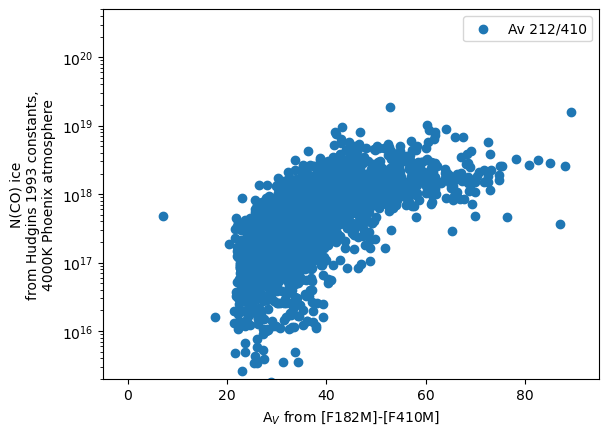

In [12]:
Avf, Ncof = co_map.plot_Av_COice(cat=cat_f)

In [13]:
cat_filament.catalog['N(CO)'] = Nco

In [14]:
cat_f.catalog['N(CO)'] = Ncof

In [15]:
mask_co = Nco > 5e19
cat_CO = JWSTCatalog(cat_filament.catalog[mask_co])

In [16]:
mask_cof = Ncof > 5e19
cat_COf = JWSTCatalog(cat_f.catalog[mask_cof])

<WCSAxes: >

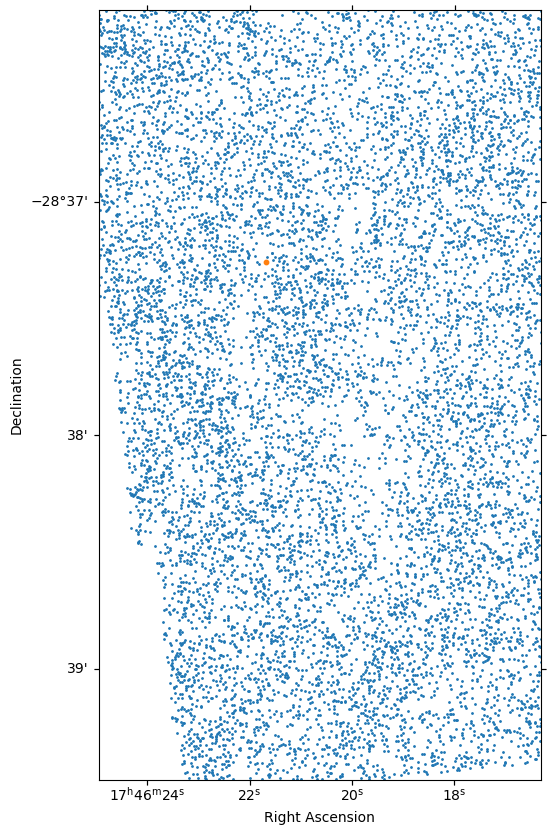

In [17]:
fig = plt.figure(figsize=(14, 10))
ax = plt.subplot(projection=ww)
ax.imshow(blank_cutout)
cat_filament.plot_position(ax, s=1, label='Filament', transform=ax.get_transform('world'))
cat_CO.plot_position(ax, s=10, label='CO', transform=ax.get_transform('world'))

<WCSAxes: >

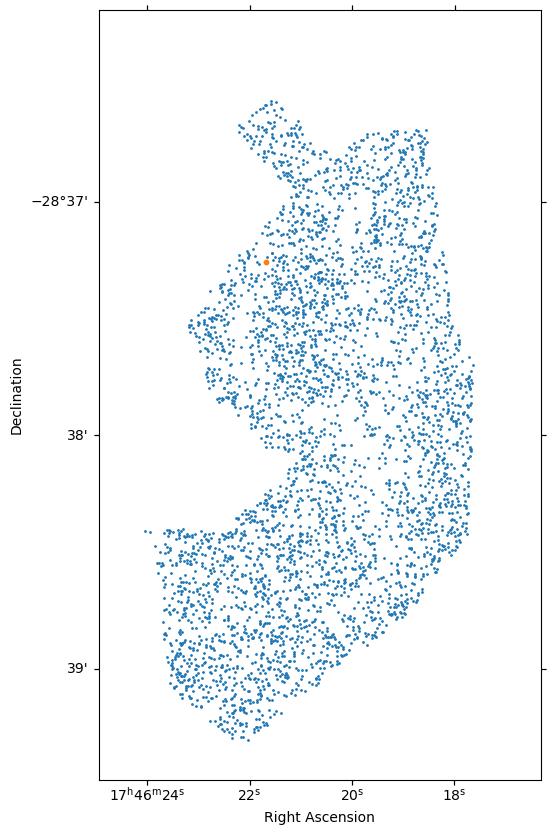

In [18]:
fig = plt.figure(figsize=(14, 10))
ax = plt.subplot(projection=ww)
ax.imshow(blank_cutout)
cat_f.plot_position(ax, s=1, label='Filament', transform=ax.get_transform('world'))
cat_COf.plot_position(ax, s=10, label='CO', transform=ax.get_transform('world'))

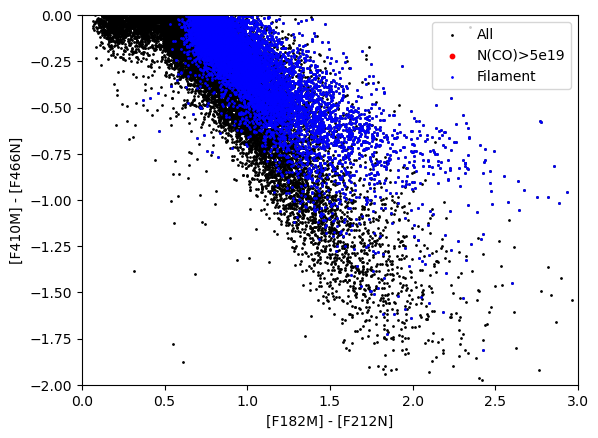

In [19]:
ax = plt.subplot(111)
cat_use.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', s=1, color='k', ax=ax, label='All')
cat_CO.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', s=10, color='r', ax=ax, label='N(CO)>5e19')
cat_filament.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', s=1, color='b', ax=ax, label='Filament')
ax.set_xlim(0,3)
ax.set_ylim(-2,0)
plt.legend()

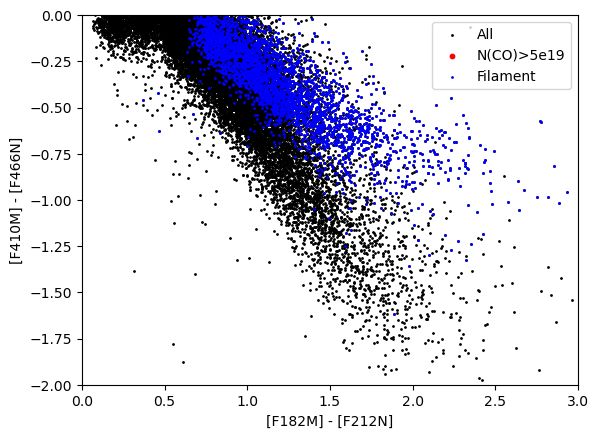

In [20]:
ax = plt.subplot(111)
cat_use.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', s=1, color='k', ax=ax, label='All')
cat_COf.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', s=10, color='r', ax=ax, label='N(CO)>5e19')
cat_f.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', s=1, color='b', ax=ax, label='Filament')
ax.set_xlim(0,3)
ax.set_ylim(-2,0)
plt.legend()

In [21]:
co_column_map = co_map.make_co_column_map(fwhm=30)

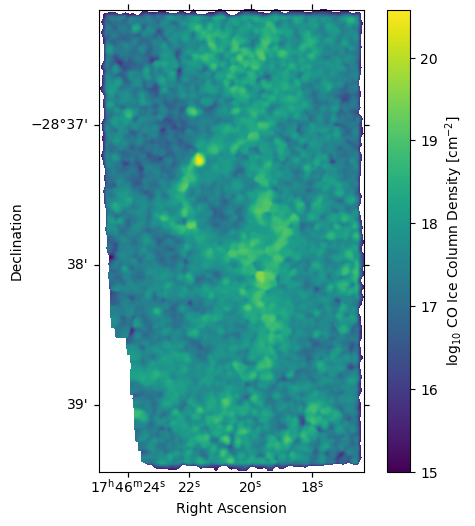

In [22]:
fig = plt.figure(figsize=(6, 6))
co_column_map[co_column_map <= 1e15] = np.nan
ww = ex.get_wcs()
ax = plt.subplot(111, projection=ww)
#norm = simple_norm(co_column_map, stretch='log', percent=99.9)
im = ax.imshow(np.log10(co_column_map), origin='lower')
cb = plt.colorbar(im, label='log$_{10}$ CO Ice Column Density [cm$^{-2}$]')
#ticks = cb.get_ticks()
#cb.set_ticks(10**ticks)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
#plt.savefig('/orange/adamginsburg/jwst/cloudc/figures/co_ice_column_density_map.pdf', bbox_inches='tight')